In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [2]:
series = 3
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=True)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
print(results.columns)
print(key_config_df.columns)

Index(['experiment_id', 'client_to_server_latencies_avg',
       'client_to_server_latencies_p99', 'client_to_server_latencies_p50',
       'client_to_server_latencies_var', 'client_to_server_latencies_max',
       'client_to_server_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_server_latencies_avg', 'model_to_server_latencies_p99',
       'model_to_server_latencies_p50', 'model_to_server_latencies_var',
       'model_to_server_latencies_max', 'model_to_server_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttle

In [3]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['1', '2', '4', '8', '16'],
    'data_type': 'text',
    'max_batch_size': ['1'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_variants': [   'resnet18',
                          'resnet34',
                          'resnet50',
                          'resnet101',
                          'resnet152'],
    'node_name': 'resnet-human',
    'pipeline_name': '5-paper-video',
    'repetition': 3,
    'replicas': [1],
    'series': 3,
    'series_meta': 'checking effect of CPU allocation change,\\n cpu type: '
                   'Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'workload_config': {'load_duration': 60, 'loads_to_test': [1]},
    'workload_type': 'static'}


Text(0, 0.5, 'Latency (seconds)')

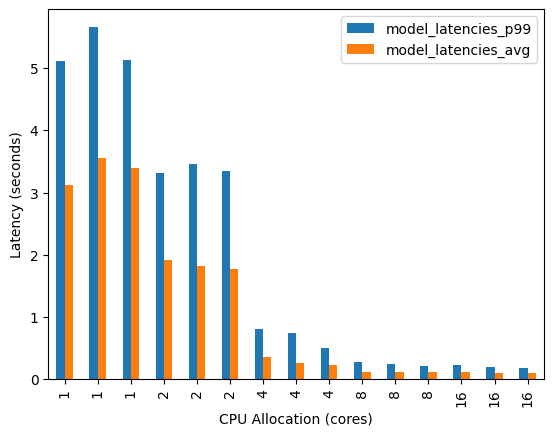

In [4]:
# resnet 18
model_variant = 'resnet18'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")

Text(0, 0.5, 'Latency (seconds)')

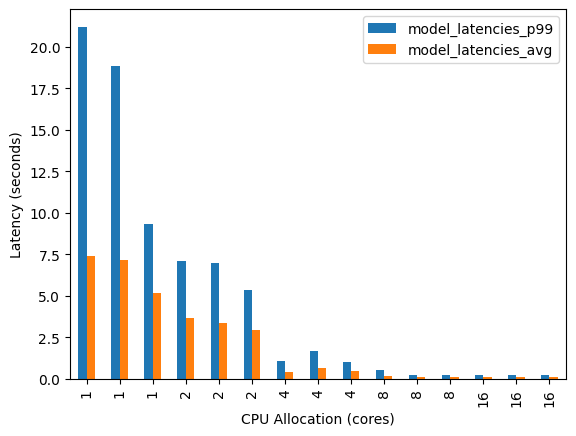

In [5]:
model_variant = 'resnet34'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")

<AxesSubplot: xlabel='cpu_request'>

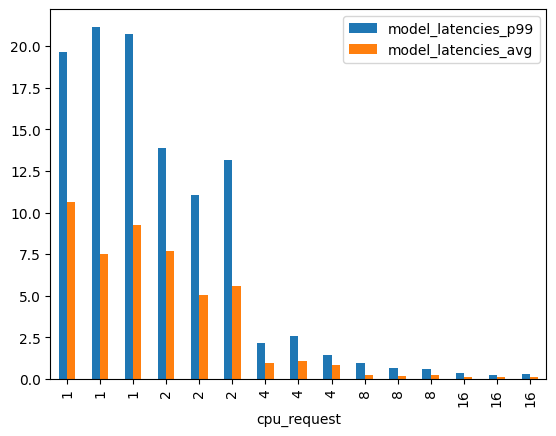

In [6]:
model_variant = 'resnet50'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

Text(0, 0.5, 'Latency (seconds)')

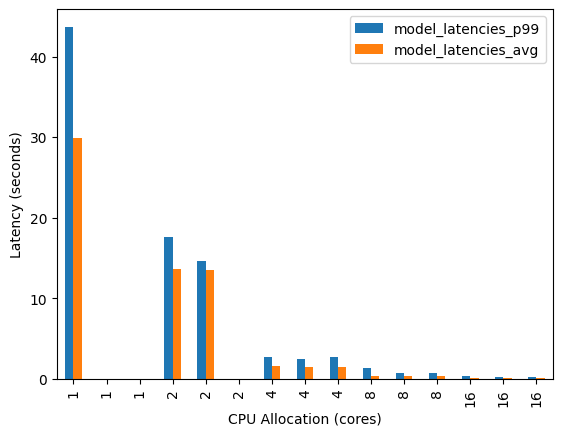

In [7]:
model_variant = 'resnet101'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")

<AxesSubplot: xlabel='cpu_request'>

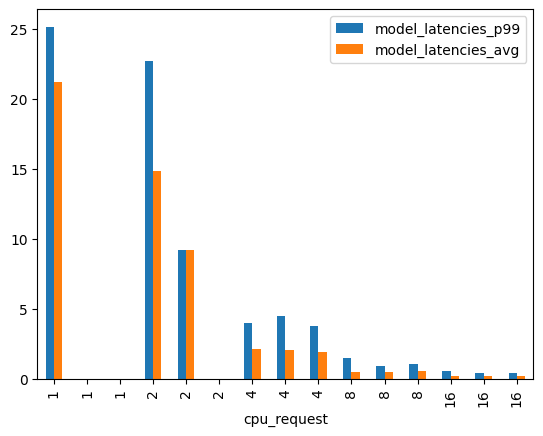

In [8]:
model_variant = 'resnet152'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,4,60Gi,0.803545,32.311601,0.355425
1,resnet18,4,60Gi,0.740544,161.037967,0.249948
2,resnet18,4,60Gi,0.498301,271.383033,0.217447
3,resnet34,4,60Gi,1.094461,33.069006,0.446891
4,resnet34,4,60Gi,1.663837,199.166623,0.635097
5,resnet34,4,60Gi,1.021941,380.141046,0.460323
6,resnet50,4,60Gi,2.159636,48.291695,0.942144
7,resnet50,4,60Gi,2.600192,321.258803,1.057938
8,resnet50,4,60Gi,1.469876,573.781093,0.864255
9,resnet101,4,60Gi,2.732887,125.786831,1.561503


Text(0, 0.5, 'Latency (seconds)')

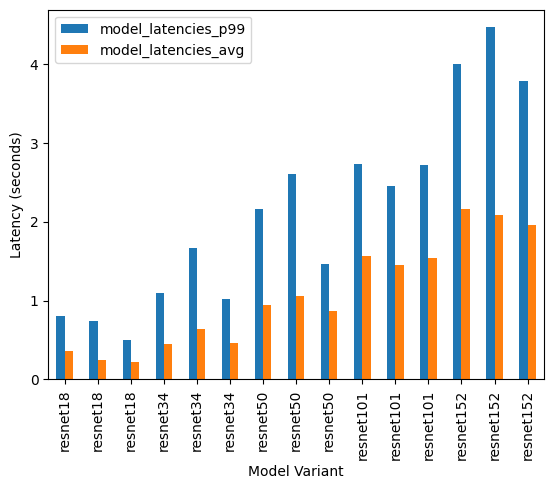

In [12]:
cpu_request = 4
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == cpu_request]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Model Variant")
ax.set_ylabel("Latency (seconds)")

,model_variant,memory_usage_max
0,resnet18,7.122616e+08
1,resnet18,7.166730e+08
2,resnet18,7.173530e+08
3,resnet34,8.595988e+08
4,resnet34,8.622940e+08
5,resnet34,8.635843e+08
6,resnet50,9.859154e+08
7,resnet50,9.983140e+08
8,resnet50,1.005855e+09
9,resnet101,1.287766e+09


Text(0, 0.5, 'Memory Usage (Mb)')

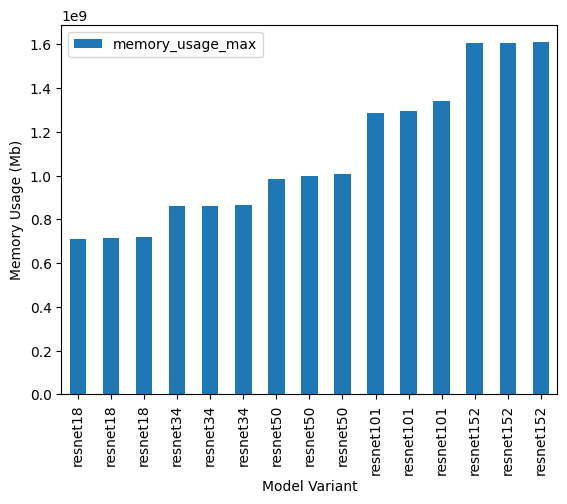

In [21]:
cpu_request = 4
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == cpu_request]['experiment_id'].tolist()
metadata_columns = ['model_variant']
results_columns = ['memory_usage_max']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['memory_usage_max'])
ax.set_xlabel("Model Variant")
ax.set_ylabel("Memory Usage (Mb)")